# Learning Curve Analysis
Visualize how model performance changes with training set size.
Assumes results from `run_learning_curve_sizes.py` (CSV with train_size, val/test metrics).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

results_path = "../data/learning_curve_sizes.csv"
df = pd.read_csv(results_path)
df = df.sort_values("train_size")

print(df.head())
print(f"Rows: {len(df)}; Train sizes: {df['train_size'].tolist()}")

   train_size                               subset_path  val_precision  \
0         500   data/train_subsets/train_subset_500.csv       0.714844   
1        1000  data/train_subsets/train_subset_1000.csv       0.745833   
2        2000  data/train_subsets/train_subset_2000.csv       0.731225   
3        3740  data/train_subsets/train_subset_3740.csv       0.774468   

   val_recall    val_f1  val_bal_acc  
0    0.762500  0.737903     0.728530  
1    0.745833  0.745833     0.745302  
2    0.770833  0.750507     0.743157  
3    0.758333  0.766316     0.768288  
Rows: 4; Train sizes: [500, 1000, 2000, 3740]


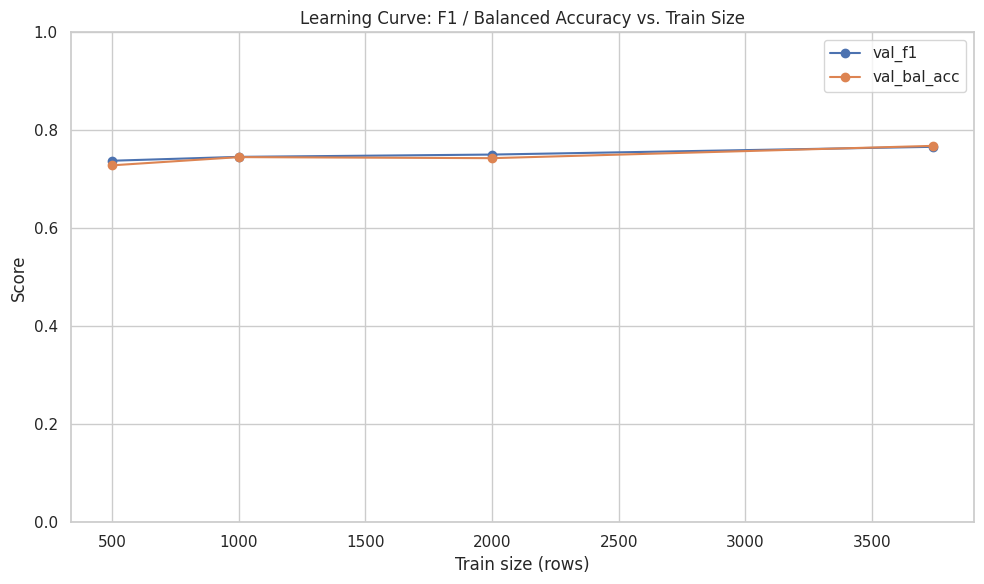

In [11]:
metrics = ["val_f1", "val_bal_acc"]

plt.figure(figsize=(10, 6))
for m in metrics:
    plt.plot(df["train_size"], df[m], marker="o", label=m)
plt.xlabel("Train size (rows)")
plt.ylabel("Score")
plt.title("Learning Curve: F1 / Balanced Accuracy vs. Train Size")
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [12]:
# If thresholds vary, inspect them
if "threshold" in df.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(df["train_size"], df["threshold"], marker="o")
    plt.xlabel("Train size (rows)")
    plt.ylabel("Best threshold (val-tuned)")
    plt.title("Chosen thresholds vs. train size")
    plt.tight_layout()
    plt.show()

df

,train_size,subset_path,val_precision,val_recall,val_f1,val_bal_acc
0,500,data/train_subsets/train_subset_500.csv,0.714844,0.762500,0.737903,0.728530
1,1000,data/train_subsets/train_subset_1000.csv,0.745833,0.745833,0.745833,0.745302
2,2000,data/train_subsets/train_subset_2000.csv,0.731225,0.770833,0.750507,0.743157
3,3740,data/train_subsets/train_subset_3740.csv,0.774468,0.758333,0.766316,0.768288
